# Importing Libraries

In [19]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import cross_val_score,learning_curve
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report,confusion_matrix,log_loss,balanced_accuracy_score


# Importing dataset and Models

In [17]:
import pickle
loaded_models = {}
X_test = pd.read_csv("Test_20\\Test_20\\X_Test_Data_Input.csv")
Y_test = pd.read_csv("Test_20\\Test_20\\Y_Test_Data_Target.csv")
X_test = X_test.drop(columns=['ID'])
Y_test = Y_test.drop(columns=['ID'])

X_train = pd.read_csv("Train_60\\Train_60\\X_Train_Data_Input.csv")
Y_train = pd.read_csv("Train_60\\Train_60\\Y_Train_Data_Target.csv")
data = pd.merge(X_train, Y_train, on='ID')

data = data.drop(columns=['ID'])

X_train = data.drop(columns=['target'])
Y_train = data['target']

randomForest_Model = joblib.load('Models\\random_forest_model.pkl')
xgb_model = joblib.load("Models\\xgb_model.pkl")
hist_Boost_Model = joblib.load("Models\\hist_Boost_Model.pkl")
lgb_model = joblib.load("Models\\lgb_model.pkl")
cb_model = joblib.load("Models\\cb_model.pkl")

models = [('Random Forest',randomForest_Model),
    ('XGBoost', xgb_model),
    ('hist Gradient Boost', hist_Boost_Model),
    ('LightGBM', lgb_model),
    ('CatBoost', cb_model)
]

In [3]:
models

[('Random Forest',
  RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                         random_state=0)),
 ('XGBoost',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=0.8, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=0, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.1, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, random_state=0, ...)),
 ('hist Gradient Boost',
  HistGradientBoostingClassifier(max_depth=7, max_iter=200,

# Creating a fuction to evaluate all the models

### Evaluation Metrics:

For the evaluation of these models, I used the following metrics:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**
- **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**

In [4]:
model_metrics = []

# Function to evaluate a model and store the metrics
def evaluate_model(name, model, X_test=X_test, y_test=Y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)

    metrics = {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }
    report = classification_report(y_test, y_pred)
    print(report)

    model_metrics.append(metrics)



### Iterating through all the models in the list and printing the metrics for each model

In [5]:

for name, model in models:
    evaluate_model(name, model)

for metric in model_metrics:
    print(metric)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    237034
           1       0.81      0.97      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.90      0.97      0.94    261712
weighted avg       0.98      0.98      0.98    261712

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712

              preci

# Defining a funtion to visualize confusion matrix

In [6]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

### Iterating through all the models and visualizing confusion matrix

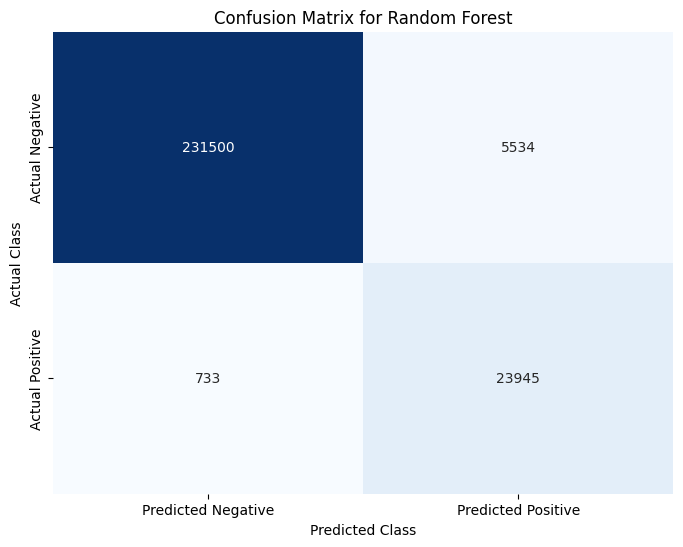

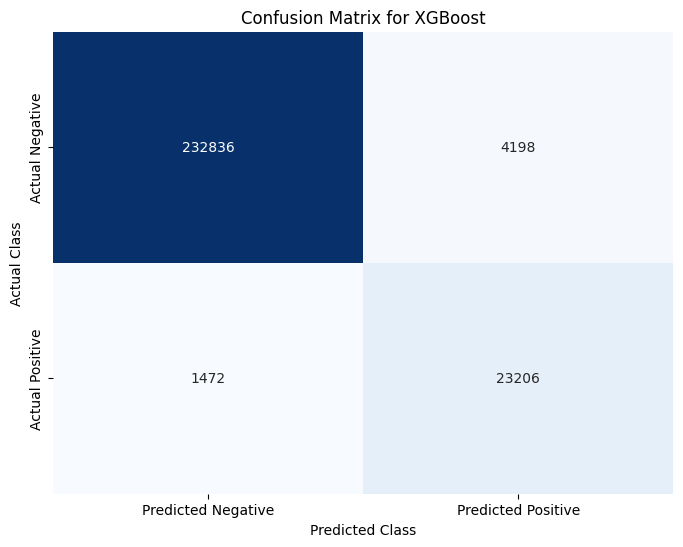

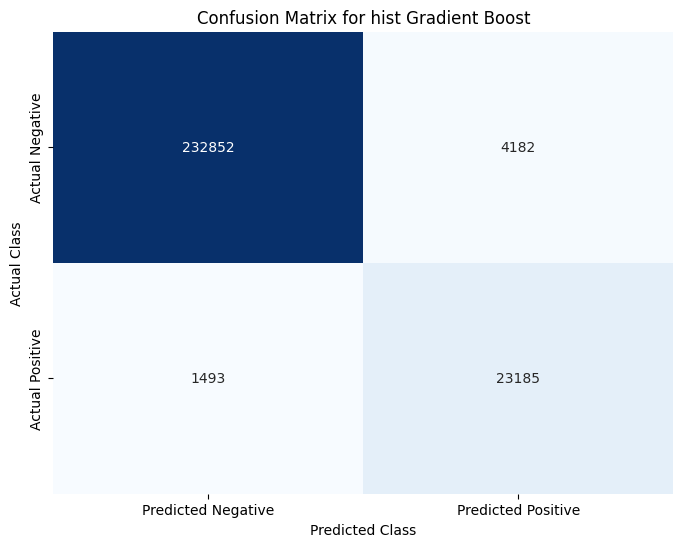

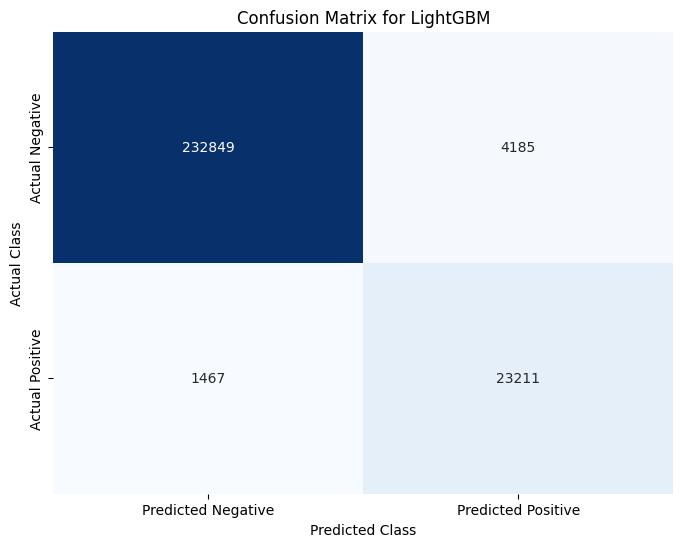

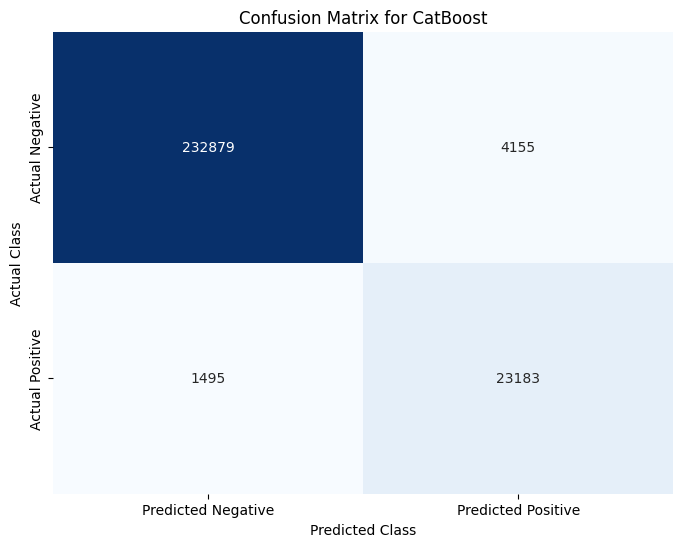

In [7]:
for name, model in models:
    y_pred = model.predict(X_test)
    plot_confusion_matrix(Y_test, y_pred, name)

### Visualizing model metrics

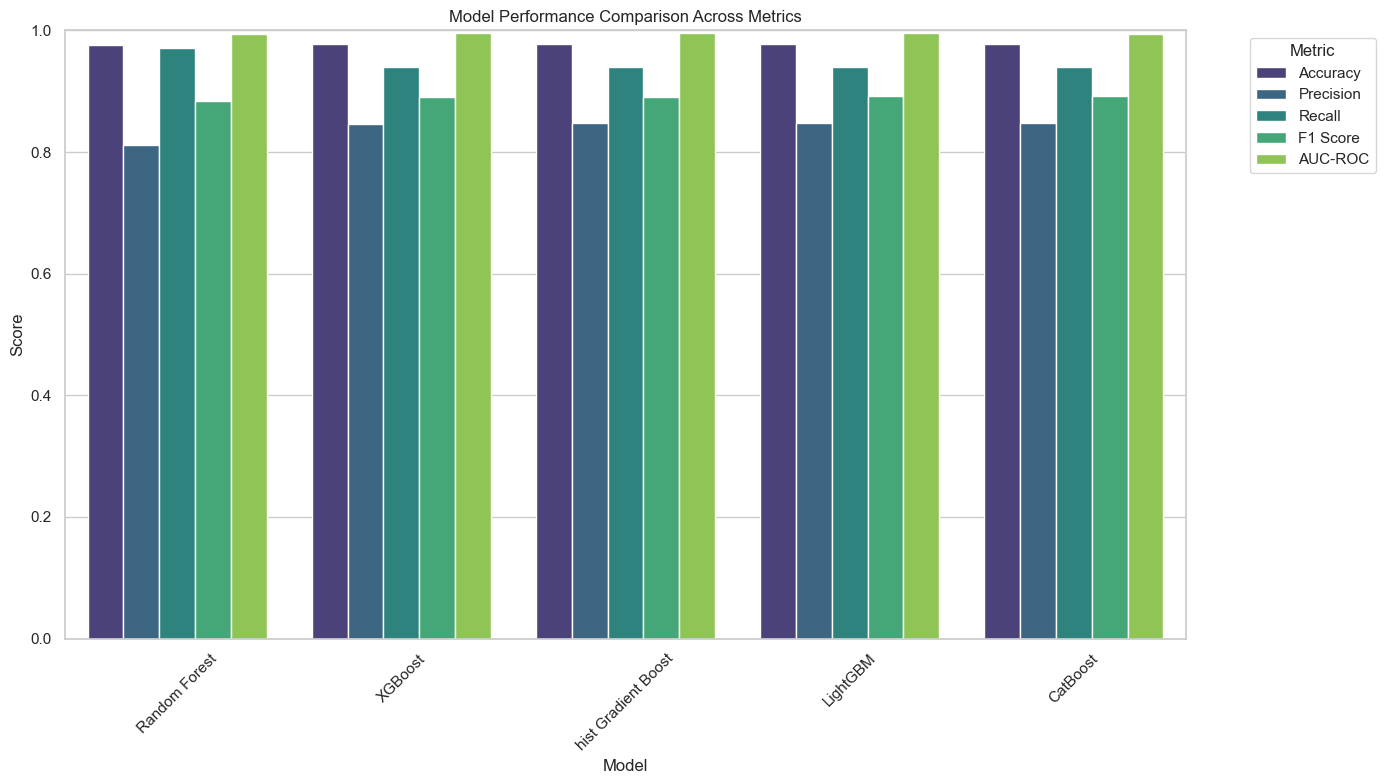

In [8]:
metrics_df = pd.DataFrame(model_metrics)

sns.set_theme(style="whitegrid")
metrics_melted = metrics_df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')

# Plot all metrics together
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_melted, palette="viridis")
plt.title('Model Performance Comparison Across Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1) 
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Feature Importance with respect to Random Forest

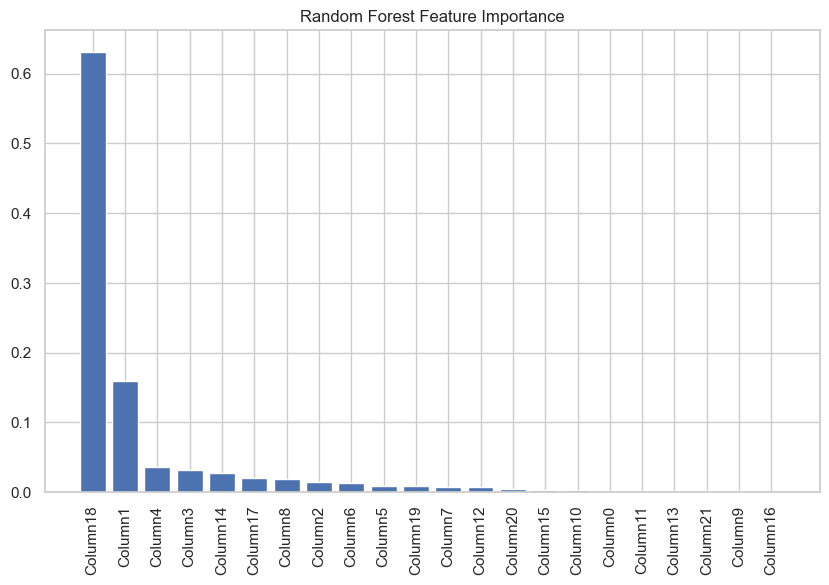

In [9]:
# Random Forest Feature Importance
importances_rf = randomForest_Model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.bar(range(len(importances_rf)), importances_rf[indices_rf], align="center")
plt.xticks(range(len(importances_rf)), X_test.columns[indices_rf], rotation=90)
plt.show()

# Feature Importance with respect to XG Boost

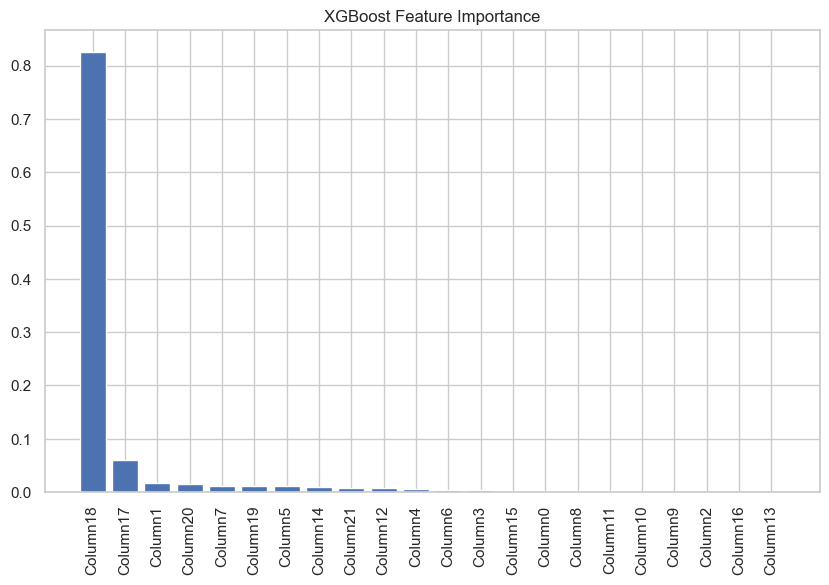

In [10]:
# XGBoost Feature Importance
importances_xgb = xgb_model.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
plt.bar(range(len(importances_xgb)), importances_xgb[indices_xgb], align="center")
plt.xticks(range(len(importances_xgb)), X_test.columns[indices_xgb], rotation=90)
plt.show()

In [11]:
def evaluate_model(model, x_test, y_test):
    y_pred_prob = model.predict_proba(x_test)
    y_pred = model.predict(x_test)
    log_loss_value = log_loss(y_test, y_pred_prob)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    return log_loss_value, balanced_accuracy

results = {}

for model_name, model in models:
    log_loss_value, balanced_accuracy = evaluate_model(model, X_test, Y_test)
    results[model_name] = {
        'Log Loss': log_loss_value,
        'Balanced Accuracy': balanced_accuracy
    }

import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

c:\Users\periy\miniconda3\envs\tf\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


                     Log Loss  Balanced Accuracy
Random Forest        0.058158           0.973475
XGBoost              0.048944           0.961321
hist Gradient Boost  0.048977           0.960929
LightGBM             0.048985           0.961449
CatBoost             0.049076           0.960945


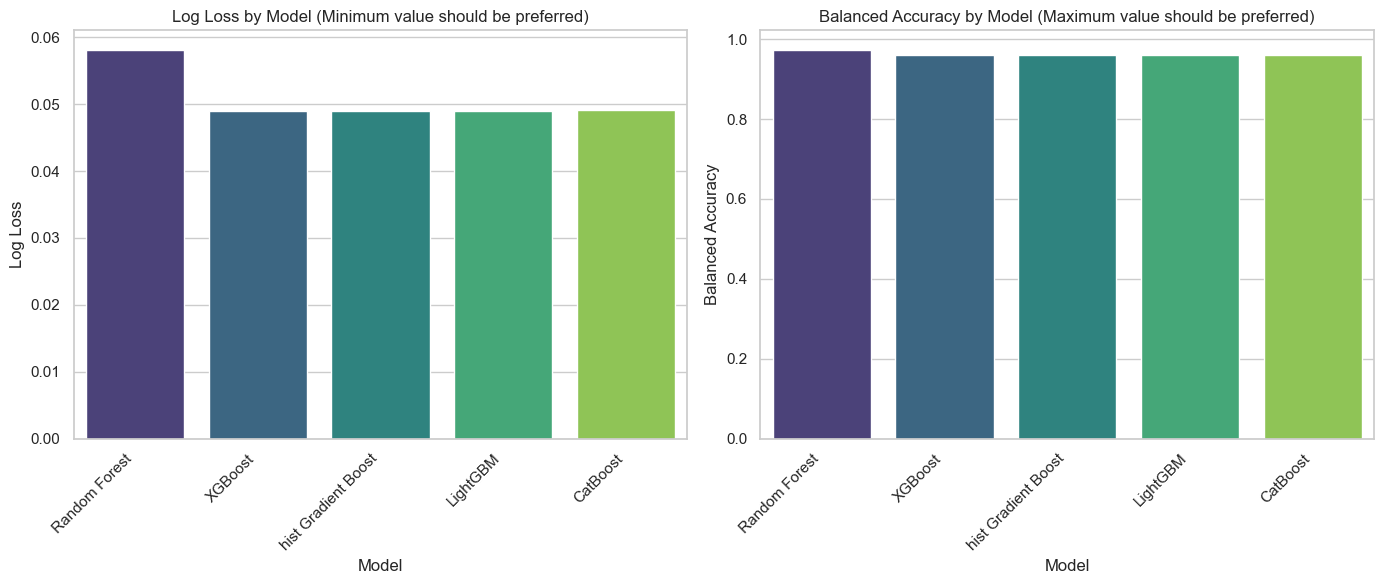

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'hist Gradient Boost', 'LightGBM', 'CatBoost'],
    'Log Loss': [0.058158, 0.048944, 0.048977, 0.048985, 0.049076],
    'Balanced Accuracy': [0.973475, 0.961321, 0.960929, 0.961449, 0.960945]
})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Model', y='Log Loss', data=results_df, ax=axes[0], palette="viridis", hue='Model', dodge=False)
axes[0].set_xticks(range(len(results_df['Model'])))
axes[0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0].set_title('Log Loss by Model (Minimum value should be preferred)')

sns.barplot(x='Model', y='Balanced Accuracy', data=results_df, ax=axes[1], palette="viridis", hue='Model', dodge=False)
axes[1].set_xticks(range(len(results_df['Model'])))
axes[1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1].set_title('Balanced Accuracy by Model (Maximum value should be preferred)')

plt.tight_layout()
plt.show()


In [18]:
cv_results = {}

# Perform 5-fold cross-validation for each model
for name, model in models:
    print(f"Performing cross-validation for {name}")
    
    # Compute cross-validation scores (using accuracy as the evaluation metric)
    scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    
    # Save results (mean accuracy and std deviation)
    cv_results[name] = {
        'Mean Accuracy': np.mean(scores),
        'Std Deviation': np.std(scores)
    }
    
    # Print the results
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}\n")

# If you want to visualize the cross-validation results in a tabular format
import pandas as pd

# Convert cv_results dictionary to a DataFrame for better visualization
cv_df = pd.DataFrame(cv_results).T  # Transpose to get models as rows
cv_df = cv_df.round(2)  # Round to 2 decimal places
print(cv_df)

Performing cross-validation for Random Forest
Random Forest Cross-Validation Accuracy: 0.98 ± 0.00

Performing cross-validation for XGBoost
XGBoost Cross-Validation Accuracy: 0.98 ± 0.00

Performing cross-validation for hist Gradient Boost
hist Gradient Boost Cross-Validation Accuracy: 0.98 ± 0.00

Performing cross-validation for LightGBM
[LightGBM] [Info] Number of positive: 59226, number of negative: 568880
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2526
[LightGBM] [Info] Number of data points in the train set: 628106, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094293 -> initscore=-2.262309
[LightGBM] [Info] Start training from score -2.262309
[LightGBM] [Info] Number of positive: 59226, number of negative: 568880
[LightGBM] [Info] Auto-choo

In [23]:


def plot_learning_curve(model, X, y, title="Learning Curves", cv=None, n_jobs=8):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    # Calculate the mean and standard deviation of training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate the mean and standard deviation of test scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

    # Plot the std deviation as a shaded region
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


Plotting learning curves for Random Forest



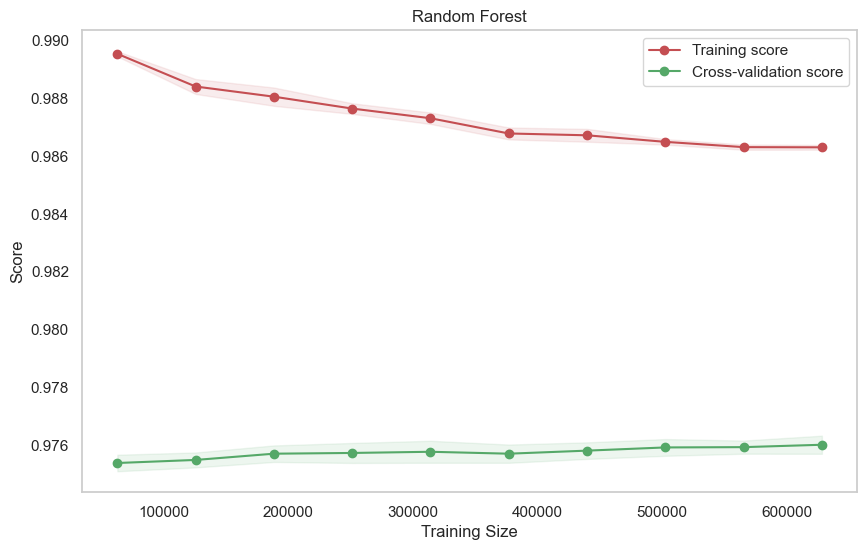

Plotting learning curves for XGBoost



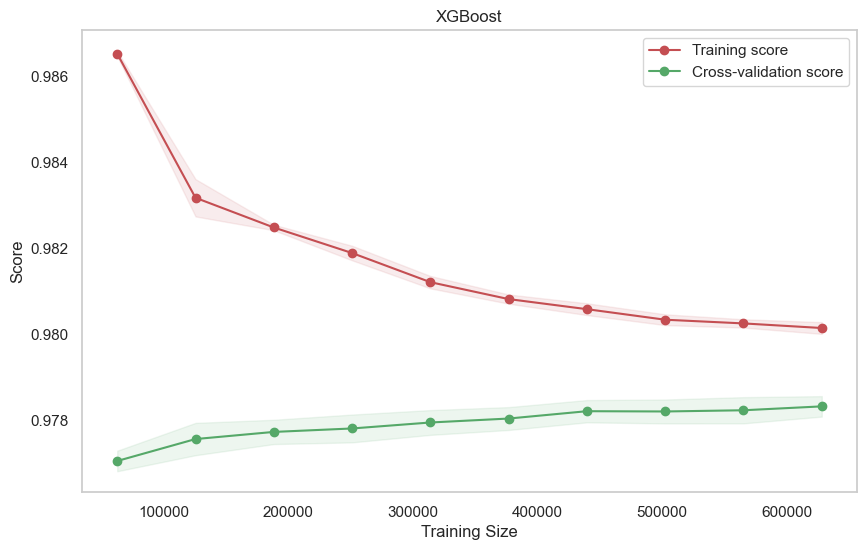

Plotting learning curves for hist Gradient Boost



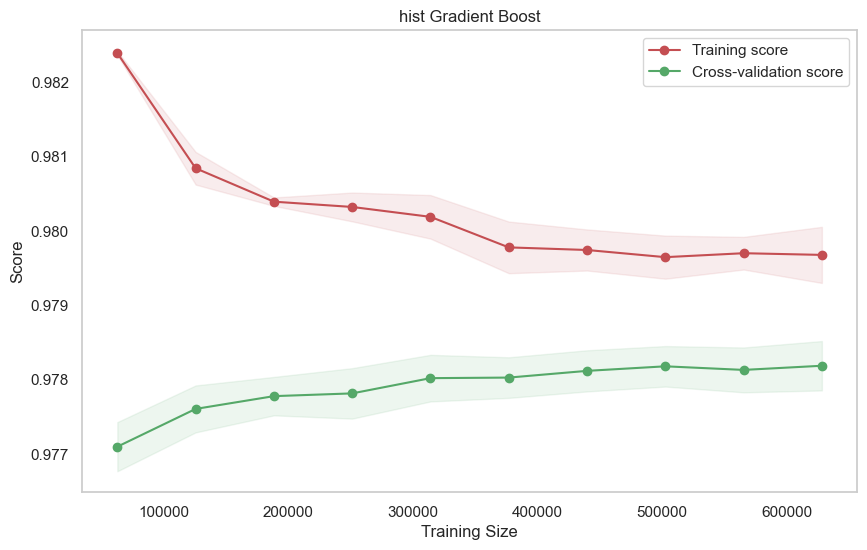

Plotting learning curves for LightGBM



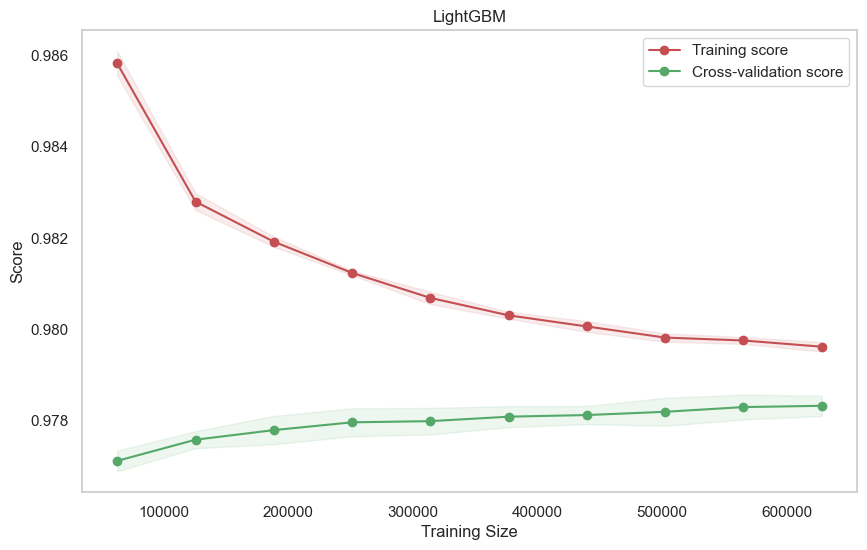

Plotting learning curves for CatBoost



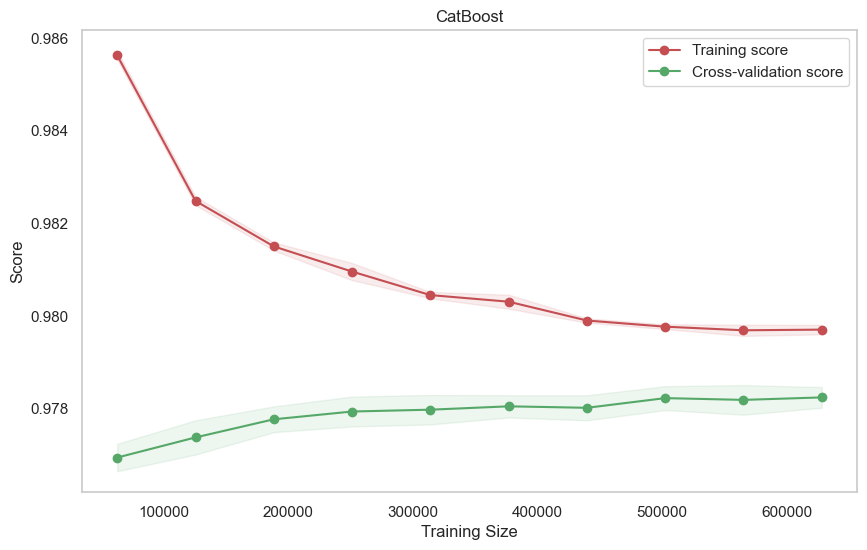

In [25]:
for name, model in models:
    print(f"Plotting learning curves for {name}\n")
    plot_learning_curve(model,X_train,Y_train,name)